# Hello Guys!

## Context

Gender is a social construct. The way males and females are treated differently since birth moulds their behaviour and personal preferences into what society expects for their gender.

This small dataset is designed to provide an idea about whether a person's gender can be predicted with an accuracy significantly above 50% based on their personal preferences.

[More informations](https://www.kaggle.com/competitions/dsm-l0-genderclassification/overview/description)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

import optuna

# Metrics
from sklearn.metrics import accuracy_score

# Load data

In [2]:
# Reading training and testing data
train_data = pd.read_csv('/kaggle/input/dsm-l0-genderclassification/train.csv')
test_data = pd.read_csv('/kaggle/input/dsm-l0-genderclassification/test.csv')

train_data.shape, test_data.shape

((55, 6), (11, 6))

In [3]:
train_data

,ID,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
1,2,Warm,Rock,Wine,Coca Cola/Pepsi,F
2,3,Warm,Folk/Traditional,Whiskey,Fanta,F
3,4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
4,5,Warm,Jazz/Blues,Doesn't drink,Fanta,F
5,6,Cool,Pop,Beer,Coca Cola/Pepsi,F
6,7,Warm,Pop,Whiskey,Fanta,F
7,8,Warm,Rock,Other,7UP/Sprite,F
8,9,Neutral,Pop,Wine,Coca Cola/Pepsi,F
9,10,Warm,Pop,Other,7UP/Sprite,F


In [4]:
test_data

,ID,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,56,Cool,Rock,Vodka,7UP/Sprite,F
1,57,Cool,Pop,Other,7UP/Sprite,F
2,58,Cool,Pop,Doesn't drink,Coca Cola/Pepsi,F
3,59,Cool,Electronic,Doesn't drink,Fanta,F
4,60,Warm,Rock,Other,Coca Cola/Pepsi,F
5,61,Neutral,Rock,Doesn't drink,Coca Cola/Pepsi,M
6,62,Cool,Hip hop,Wine,Coca Cola/Pepsi,M
7,63,Cool,Rock,Doesn't drink,Other,M
8,64,Cool,Hip hop,Doesn't drink,Other,M
9,65,Cool,Electronic,Other,Fanta,M


# Data Visualization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns



#### Plotting gender based on favorite color

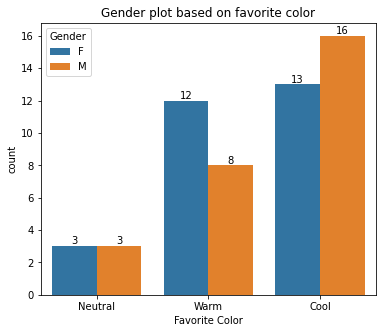

In [6]:
plt.figure(figsize=(6,5))
ax = sns.countplot(data=train_data,x = 'Favorite Color',hue = 'Gender')

for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
    
plt.title('Gender plot based on favorite color')
plt.show()

* Seems Cool colors favored by Male and Warm colors favored by Female persons

#### Plotting gender based on favorite music genre

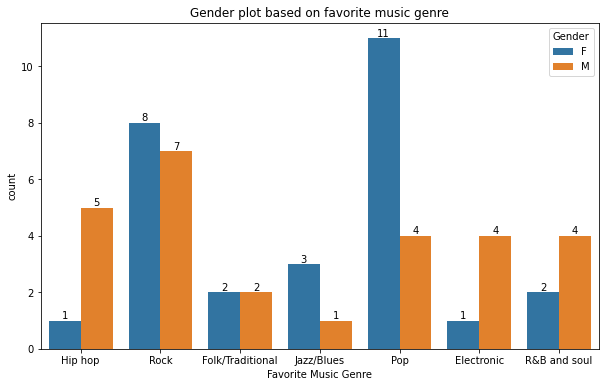

In [7]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=train_data,x = 'Favorite Music Genre',hue = 'Gender')

for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
    
plt.title('Gender plot based on favorite music genre')
plt.show()

* Overall Pop and Rock music are mostly loved among all
* Hip hop, Electronic and R&B and soul music loved by Male persons
* Pop and Jazz/Blues mostly loved by Female persons
* Seems Rock music and Folk/Traditional loved equally

#### Plotting gender based on favorite beverage

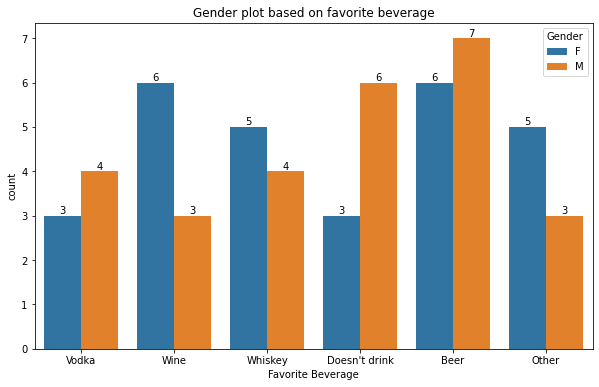

In [8]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=train_data,x = 'Favorite Beverage',hue = 'Gender')

for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
    
plt.title('Gender plot based on favorite beverage')
plt.show()

# Data Preprocessing

#### Check the mixing values

In [9]:
train_data.isnull().sum()

ID                      0
Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

* We have no missing values in train data.

In [10]:
test_data.isnull().sum()

ID                      0
Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

* We have no missing values in test data.

#### Check the type of features

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    55 non-null     int64 
 1   Favorite Color        55 non-null     object
 2   Favorite Music Genre  55 non-null     object
 3   Favorite Beverage     55 non-null     object
 4   Favorite Soft Drink   55 non-null     object
 5   Gender                55 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.7+ KB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    11 non-null     int64 
 1   Favorite Color        11 non-null     object
 2   Favorite Music Genre  11 non-null     object
 3   Favorite Beverage     11 non-null     object
 4   Favorite Soft Drink   11 non-null     object
 5   Gender                11 non-null     object
dtypes: int64(1), object(5)
memory usage: 656.0+ bytes


#### Encode data

Here, we are going to encode all object features

In [13]:
cols = test_data.columns.tolist() # Get columns(features) list
cols.remove('ID') # Remove ID, it's not a object type
cols

['Favorite Color',
 'Favorite Music Genre',
 'Favorite Beverage',
 'Favorite Soft Drink',
 'Gender']

In [14]:
le = LabelEncoder()

for col in cols:
    train_data[col] = le.fit_transform(train_data[col]) # Encode each data train feature
    test_data[col] = le.transform(test_data[col])       # Encode each data test feature

#### Concat train and test data

In [15]:
all_data = pd.concat([train_data, test_data]).reset_index(drop=True)
all_data

,ID,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,1,1,2,3,1,0
1,2,2,6,5,1,0
2,3,2,1,4,2,0
3,4,0,6,3,1,0
4,5,2,3,1,2,0
...,...,...,...,...,...,...
61,62,0,2,5,1,1
62,63,0,6,1,3,1
63,64,0,2,1,3,1
64,65,0,0,2,2,1


#### Separating features and target

In [16]:
X_train = all_data.drop(['ID','Gender'],axis=1)
y_train = all_data['Gender']

X_test = test_data.drop(['ID','Gender'],axis=1)
y_test = test_data['Gender']

# Modeling

Here, we will compare the performance of three algos. We will use :
1. CatBoostClassifier : [doc here](https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier)
2. XGBClassifier : [doc here](https://xgboost.readthedocs.io/en/stable/python/python_api.html)
3. LGBMClassifier : [doc here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)

In [17]:
models = [
    CatBoostClassifier(verbose=False), 
    xgb.XGBClassifier(), 
    lgb.LGBMClassifier()
]

#### Training, Testing and Evaluating Models

In [18]:
for model in models:
    # Fit model
    model.fit(X_train,y_train)  
    
    # Test Model
    predict = model.predict(X_test)              
    
    # Evaluate model
    print(f"Accuracy score ({str(model)}) : ", accuracy_score(y_test, predict), '\n')

Accuracy score (<catboost.core.CatBoostClassifier object at 0x7f29a1e38210>) :  0.9090909090909091 

[11:13:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy score (XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)) :  0.9090909090909091 

Accuracy score (LGBMClassifier()) :  0.9090909090909091 



# Catboost with Optuna 

Here, we'll use optuna to search the best params of catboost model 

In [19]:
def objectiveCatboost(trial):
    iterations = trial.suggest_int("iterations", 10, 2000)
    max_depth = trial.suggest_int("max_depth", 1, 16)
    random_state = trial.suggest_int("random_state", 1, 2022)
    learning_rate = trial.suggest_float("learning_rate", 0.0001, 1)
    verbose = trial.suggest_int("verbose", 0, 0)
    
    clf = CatBoostClassifier(iterations = iterations,
                               max_depth = max_depth,
                               learning_rate = learning_rate,
                               random_state = random_state,
                               verbose=verbose
                              )
    clf.fit(X_train, y_train)
    return clf.score(X_test, y_test)


study = optuna.create_study(direction = "maximize")
study.optimize(objectiveCatboost, n_trials=12)

[I 2022-05-10 11:13:34,326] A new study created in memory with name: no-name-84dccb08-6905-4504-bdec-24c27e6580b9
[I 2022-05-10 11:13:34,412] Trial 0 finished with value: 0.8181818181818182 and parameters: {'iterations': 334, 'max_depth': 1, 'random_state': 227, 'learning_rate': 0.6341733692869101, 'verbose': 0}. Best is trial 0 with value: 0.8181818181818182.
[I 2022-05-10 11:13:43,299] Trial 1 finished with value: 1.0 and parameters: {'iterations': 1863, 'max_depth': 16, 'random_state': 839, 'learning_rate': 0.1082911550190395, 'verbose': 0}. Best is trial 1 with value: 1.0.
[I 2022-05-10 11:13:43,425] Trial 2 finished with value: 1.0 and parameters: {'iterations': 570, 'max_depth': 3, 'random_state': 444, 'learning_rate': 0.9635542517702882, 'verbose': 0}. Best is trial 1 with value: 1.0.
[I 2022-05-10 11:13:49,815] Trial 3 finished with value: 1.0 and parameters: {'iterations': 1562, 'max_depth': 14, 'random_state': 461, 'learning_rate': 0.8591557463145604, 'verbose': 0}. Best is t

In [20]:
parameters = study.best_params
parameters

{'iterations': 1863,
 'max_depth': 16,
 'random_state': 839,
 'learning_rate': 0.1082911550190395,
 'verbose': 0}

In [21]:
model = CatBoostClassifier(**parameters)

model.fit(X_train,y_train)
predict = model.predict(X_test)
print("CatBoostClassifier with Optuna Accuracy score : ", accuracy_score(predict, y_test), '\n')

CatBoostClassifier with Optuna Accuracy score :  1.0 



# Submission on kaggle

In [22]:
sub = pd.read_csv('../input/dsm-l0-genderclassification/submission.csv')
sub

,ID,Gender
0,56,1
1,57,1
2,58,1
3,59,1
4,60,1
5,61,1
6,62,1
7,63,1
8,64,1
9,65,1


In [23]:
sub['Gender'] = predict
sub['Gender'].value_counts()

# Save sub file
sub.to_csv("submission.csv", index=False)

<center>
    <h2 style="color: #f48b6b"> Thanks for reading 👍 </h2>